
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [1]:
import pandas as pd

data_input = pd.read_csv('../../datasets/Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


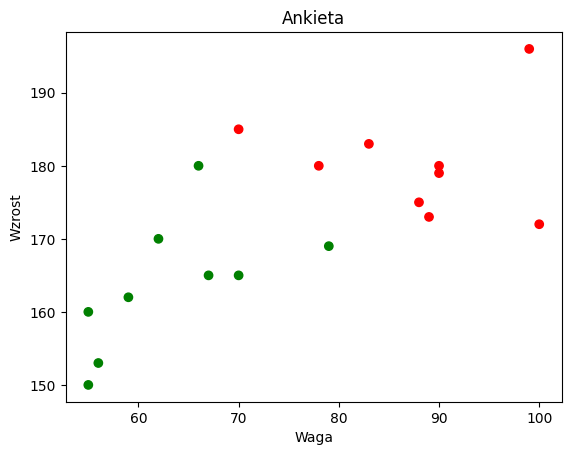

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_23524\1618543461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_input.hist(ax=ax)


array([[<Axes: title={'center': 'Waga'}>,
        <Axes: title={'center': 'Wzrost'}>],
       [<Axes: title={'center': 'Plec'}>, <Axes: >]], dtype=object)

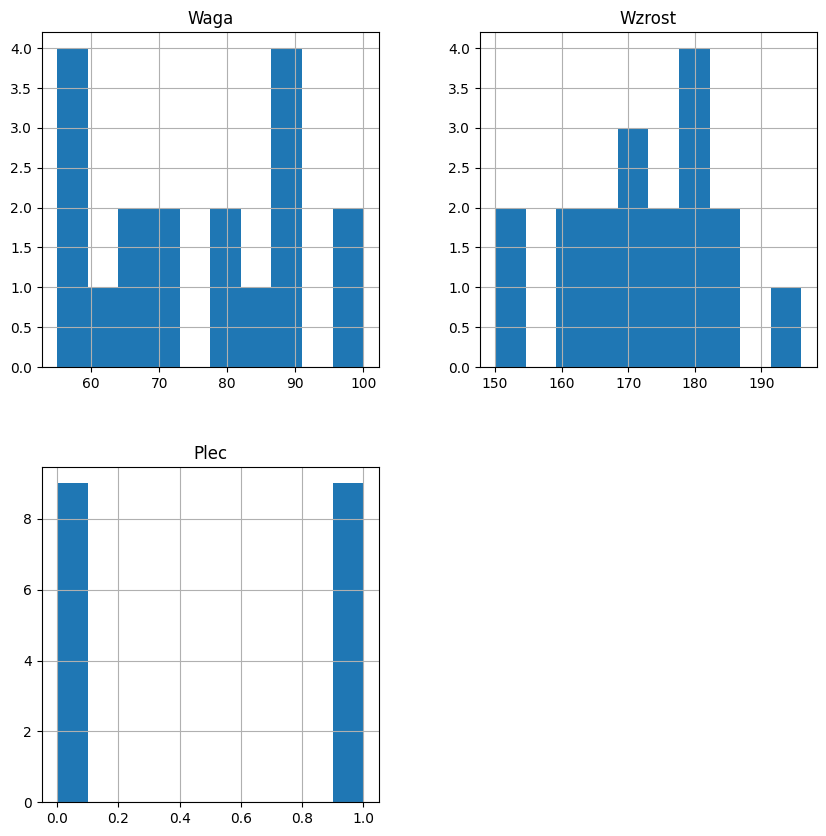

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

<Axes: >

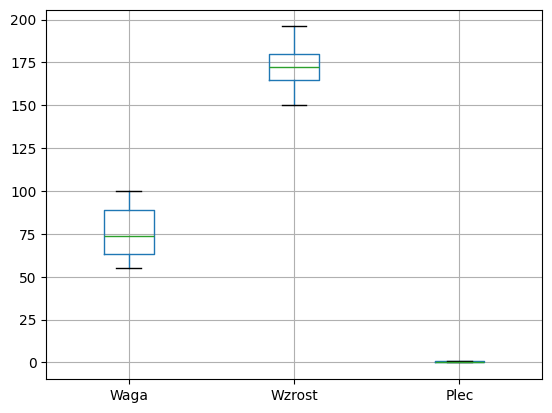

In [4]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane? Co można powiedzieć o ich zakresach. W jakim celu dokonujemy normalizacji?

In [5]:
#INSERT YOUR CODE HERE
import sklearn.preprocessing as skl
data_input[['Waga'] + ['Wzrost']] = skl.StandardScaler().fit_transform(data_input[['Waga'] + ['Wzrost']])

<Axes: >

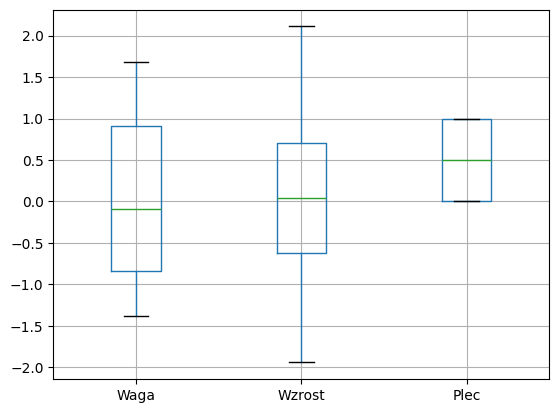

In [6]:
data_input.boxplot()

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym. Proszę zadbać o odpowiednią inicjalizacje generatora pseudolosowego

In [7]:
# YOUR CODE HERE

random_state = 12345678

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(data_input[['Waga'] + ['Wzrost']],data_input['Plec'], test_size=0.2,random_state=random_state)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [8]:
from sklearn.svm import SVC

#YOUR CODE HERE

# Inicjalizacja klasyfikatora SVC
svc_classifier = SVC(random_state=random_state)

# Trenowanie klasyfikatora na danych treningowych
svc_classifier.fit(train_x, train_y)

# Ocena klasyfikatora na danych testowych
accuracy = svc_classifier.score(test_x, test_y)
print(f'Skuteczność ze standaryzacją: {accuracy}')

Skuteczność ze standaryzacją: 0.75


In [9]:
data_input_noSCL = pd.read_csv('../../datasets/Ankieta.csv')

train_x, test_x, train_y, test_y = train_test_split(data_input_noSCL[['Waga'] + ['Wzrost']],data_input_noSCL['Plec'], test_size=0.2,random_state=random_state)

# Inicjalizacja klasyfikatora SVC
svc_classifier = SVC(random_state=random_state)

# Trenowanie klasyfikatora na danych treningowych
svc_classifier.fit(train_x, train_y)

# Ocena klasyfikatora na danych testowych
accuracy = svc_classifier.score(test_x, test_y)
print(f'Skuteczność bez standaryzacją: {accuracy}')

Skuteczność bez standaryzacją: 0.75


## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

In [10]:
# #YOUR CODE HERE
# import numpy as np
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions

# # Zakres wartości parametru C
# C_range = np.arange(0.1, 1.1, 0.1)

# X = np.array(data_input[['Waga'] + ['Wzrost']])  # Wybierz dwie cechy dla przykładu
# y = np.array(data_input['Plec'])

# for C in C_range:
#     svm = SVC(C=C)
#     svm.fit(X, y)
#     # Narysuj płaszczyzny decyzyjne
#     plot_decision_regions(X, y, clf=svm, legend=1)
#     # Pokaż wykres
#     plt.show()



MovieWriter imagemagick unavailable; using Pillow instead.


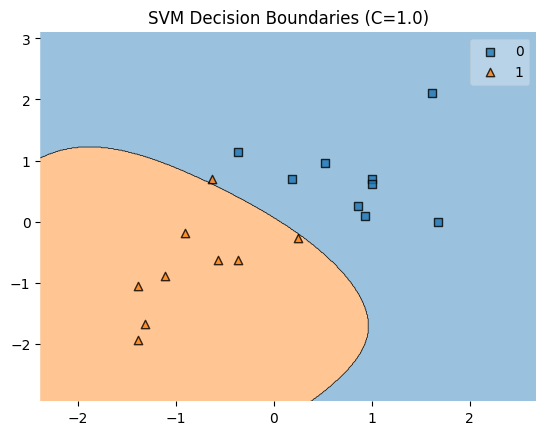

In [11]:
from matplotlib.animation import FuncAnimation
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.svm import SVC

# Zakres wartości parametru C
C_range = np.arange(0.1, 1.1, 0.1)

X = np.array(data_input[['Waga', 'Wzrost']])  # Wybierz dwie cechy dla przykładu
y = np.array(data_input['Plec'])

fig, ax = plt.subplots()
ax.set_xlabel('Waga')
ax.set_ylabel('Wzrost')
ax.set_title('SVM Decision Boundaries Animation')

# Inicjalizacja pustego wykresu
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(C):
    ax.clear()  # Usuń poprzedni wykres przed narysowaniem nowego
    svm = SVC(C=C,random_state=random_state)
    svm.fit(X, y)
    plot_decision_regions(X, y, clf=svm, legend=1, ax=ax)
    ax.set_title(f'SVM Decision Boundaries (C={C})')
    return line,

ani = FuncAnimation(fig, update, frames=C_range, init_func=init, blit=True)

# Zapisz animację jako plik GIF
ani.save('svm_animation.gif', writer='imagemagick', fps=2)


## Zadanie 5

Proszę dokonać pomiaru czasu wykonania algorytmu dla min. 2 różnych kerneli

In [12]:
#YOUR CODE HERE

import time

# Inicjalizacja klasyfikatora SVC
svc_classifier = SVC(kernel="linear",random_state=random_state)


begin_time = time.time()
# Trenowanie klasyfikatora na danych treningowych
svc_classifier.fit(train_x, train_y)
end_time = time.time()

print(f'Czas dla linear: {end_time - begin_time}s')

# Inicjalizacja klasyfikatora SVC
svc_classifier = SVC(kernel="poly",random_state=random_state)


begin_time = time.time()
# Trenowanie klasyfikatora na danych treningowych
svc_classifier.fit(train_x, train_y)
end_time = time.time()

print(f'Czas dla poly: {end_time - begin_time}s')



Czas dla linear: 0.0019989013671875s
Czas dla poly: 0.0020029544830322266s


### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 6

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

In [13]:
#YOUR CODE HERE
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_coimbra = fetch_ucirepo(id=451) 
  
# data (as pandas dataframes) 
X = breast_cancer_coimbra.data.features 
y = breast_cancer_coimbra.data.targets 
  
# metadata 
print(breast_cancer_coimbra.metadata) 
  
# variable information 
print(breast_cancer_coimbra.variables) 

{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intro_paper': {'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer', 'authors': 'M. Patrício, J. Pereira, J. Cri

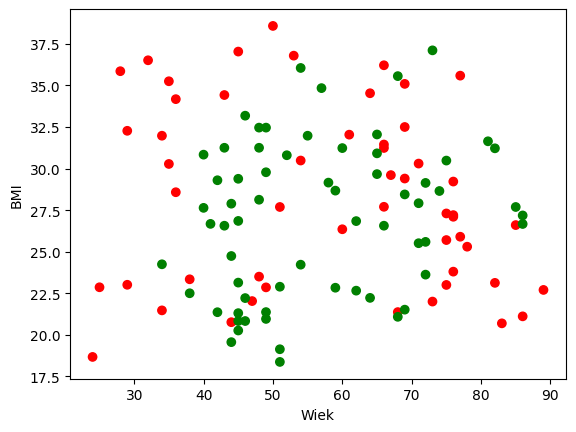

In [14]:
x = X['Age']
z = X['BMI']

plt.scatter(x, z, c=np.array(y), cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Wiek')
plt.ylabel('BMI')
plt.show()

## Zadanie 7

Proszę dokonać standaryzacji danych

In [15]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [16]:
X = pd.DataFrame(data=skl.StandardScaler().fit_transform(breast_cancer_coimbra.data.features),columns=breast_cancer_coimbra.data.features.columns.tolist())
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,-0.579794,-0.816675,-1.239222,-0.728739,-0.614282,-0.932334,-0.070222,-0.545517,-0.341251
1,1.601821,-1.378751,-0.258299,-0.688038,-0.548240,-0.930413,-0.697350,-0.864214,-0.191224
2,1.539489,-0.891764,-0.302887,-0.550073,-0.464752,-0.454219,1.797998,-0.441660,0.058214
3,0.666843,-1.243303,-0.927110,-0.676965,-0.574210,-0.876021,-0.441945,-0.158867,1.142718
4,1.788816,-1.294601,-0.258299,-0.644743,-0.521081,-1.042682,-0.786881,-0.336352,0.694716
...,...,...,...,...,...,...,...,...,...
111,-0.766789,-0.146468,-0.258299,-0.666590,-0.534786,1.469335,0.281654,-0.305255,-0.773527
112,0.292852,-0.148468,0.098400,-0.546881,-0.435039,-0.741611,1.649470,-0.600299,-0.593717
113,0.479848,0.893855,-0.035362,-0.427172,-0.365106,1.825348,1.813843,-0.356320,-0.640491
114,0.916171,-0.398546,-0.704173,-0.717467,-0.585883,-0.086651,3.459038,-0.928577,-0.412832


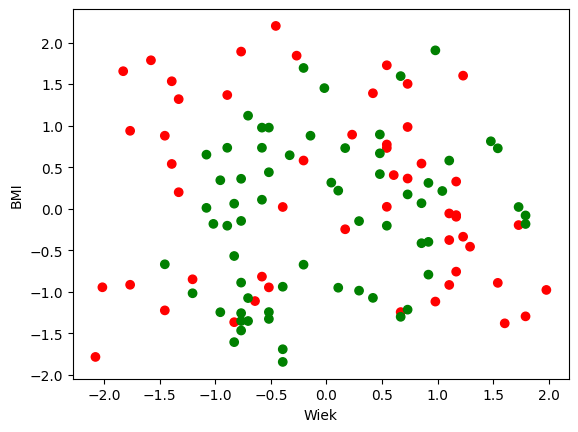

In [17]:
x = X['Age']
z = X['BMI']

plt.scatter(x, z, c=np.array(y), cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Wiek')
plt.ylabel('BMI')
plt.show()

## Zadanie 8

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [18]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2,random_state=random_state)
test_y = np.array(test_y).ravel()
train_y = np.array(train_y).ravel()

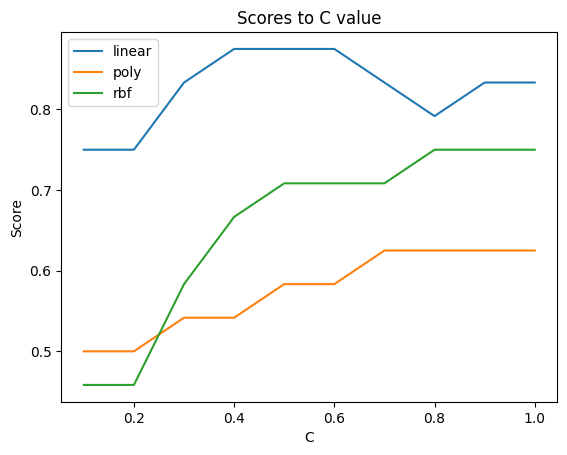

In [19]:
# Zakres wartości parametru C
C_range = np.arange(0.1, 1.1, 0.1)

# Lista dostępnych kerneli
kernels = ['linear', 'poly', 'rbf']

# Dla każdego kernela
for kernel in kernels:
    scores = []
    # Dla każdej wartości C
    for C in C_range:
        # Utwórz model SVM
        svm = SVC(C=C, kernel=kernel,random_state=random_state)
        svm.fit(train_x, train_y)
        # Oblicz i zapisz wynik dokładności
        scores.append(svm.score(test_x, test_y))
    # Narysuj wykres
    plt.plot(C_range, scores, label=kernel)

# Konfiguracja wykresu
plt.title("Scores to C value")
plt.legend()
plt.xlabel("C")
plt.ylabel("Score")
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


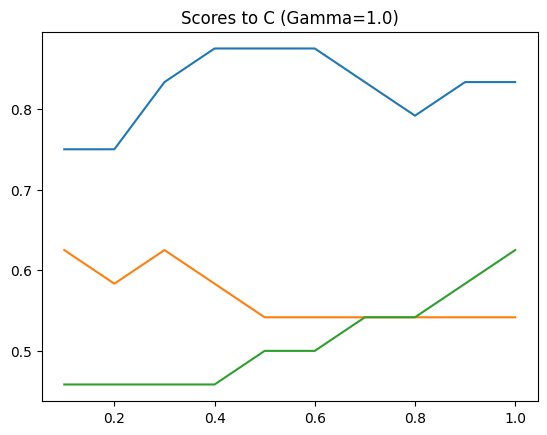

In [20]:
# Zakres wartości parametru C i gamma
C_range = np.arange(0.1, 1.1, 0.1)
Gamma_range = np.arange(0.01, 1.01, 0.01)

fig, ax = plt.subplots()
ax.set_xlabel('C')
ax.set_ylabel('Score')
ax.set_title('Scores to C')

best_score = 0.0
best_params = {"kernel": "", "C": 0, "gamma": 0}

# Inicjalizacja pustego wykresu
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(Gamma):
    ax.clear()  # Usuń poprzedni wykres przed narysowaniem nowego
    global best_score
    global best_params
    scores = {"linear": [], "poly": [], "rbf": []}

    for C in C_range:
        for kernel in ['linear', 'poly', 'rbf']:
            svm = SVC(C=C, kernel=kernel, gamma=Gamma,random_state=random_state)
            svm.fit(train_x, train_y)
            score = svm.score(test_x, test_y)
            scores[kernel].append(score)

            if score > best_score:
                best_score = score
                best_params["kernel"] = kernel
                best_params["C"] = C
                best_params["gamma"] = Gamma

    for kernel, score_list in scores.items():
        ax.plot(C_range, score_list, label=kernel.capitalize())

    ax.set_title(f'Scores to C (Gamma={Gamma})')
    return line,

ani = FuncAnimation(fig, update, frames=Gamma_range, init_func=init, blit=True)

# Zapisz animację jako plik GIF
ani.save('svm_animation_3.gif', writer='imagemagick', fps=1)


In [21]:
print(f'Najlepszy wynik: {best_score}, dla konfiguracji: {best_params}')

Najlepszy wynik: 0.875, dla konfiguracji: {'kernel': 'linear', 'C': 0.4, 'gamma': 0.01}


In [22]:
best_params['gamma']

0.01

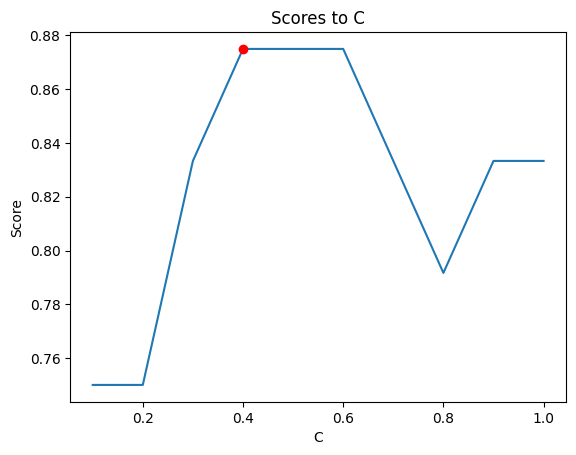

In [23]:
plt.xlabel('C')
plt.ylabel('Score')
plt.title('Scores to C')

scores = []
for C in C_range:
    svm = SVC(C=C, kernel=best_params['kernel'], gamma=best_params['gamma'], random_state=random_state)
    svm.fit(train_x, train_y)
    # Narysuj płaszczyzny decyzyjne
    scores.append(svm.score(test_x,test_y))
    # Pokaż wykres
plt.plot(np.arange(0.1, 1.1, 0.1), scores)
plt.plot(best_params['C'], best_score, marker='o', color='red') 

## Zadanie 9

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [26]:
#YOUR CODE HERE
import sklearn.metrics as sklm

svm = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
svm.fit(train_x, train_y)

sklm.confusion_matrix(test_y, svm.predict(test_x))

array([[11,  2],
       [ 1, 10]], dtype=int64)

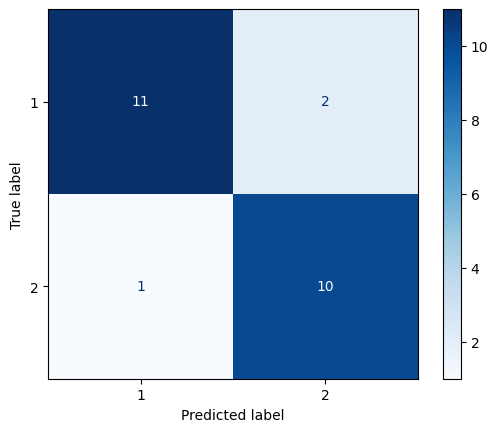

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        test_x,
        test_y,
        cmap=plt.cm.Blues,
    )
plt.show()